
# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [14]:
!pip install -q kaggle

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


'chmod 600 /root/.kaggle/kaggle.json'

In [31]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cbiltrng/book-img

In [ ]:
!unzip book-img.zip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/crop_img2.zip'

In [17]:
! pip install --quiet vietocr==0.3.12

# Inference

In [54]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [55]:
config = Cfg.load_config_from_name('vgg_seq2seq')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [56]:
# config['weights'] = './weights/transformerocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [57]:
detector = Predictor(config)

Model weight /tmp/vgg_seq2seq.pth exsits. Ignore download!


In [ ]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip

Traceback (most recent call last):

unzip:  cannot find or open sample.zip, sample.zip.zip or sample.zip.ZIP.


In [ ]:
! ls sample | shuf |head -n 5

ls: cannot access 'sample': No such file or directory


'015208'

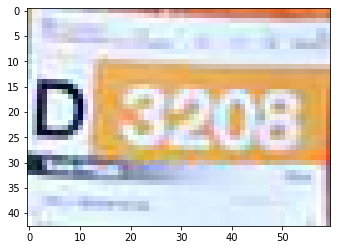

In [ ]:
img = './a.JPG'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [ ]:
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE

Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/data_line.zip
61.2MB [00:00, 72.6MB/s]


In [ ]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [23]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [24]:
config = Cfg.load_config_from_name('vgg_seq2seq')

In [41]:
config['vocab'] = 'ĚŠřaAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

dataset_params = {
    'name':'ye',
    'data_root':'/content/crop_images/',
    'train_annotation':'train_imgs.txt',
    'valid_annotation':'test_imgs.txt',
    # 'image_height':64
}

params = {
         'print_every':200,
         'valid_every':200,
          'iters':1600,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 1000,
          'batch_size': 32
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [35]:
config

{'vocab': 'ĚŠřaAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 16,
  'print_every': 200,
  'valid_every': 200,
  'iters': 1000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 100},
 'dataset': {'name': 'new3',
  'data_root': '/content/crop_images/',
  'train_annotation': 'train_imgs.txt',
  'valid_annotation': 'test_imgs.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 

You should train model from our pretrained

In [42]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_seq2seq.pth exsits. Ignore download!
transformer.decoder.embedding.weight missmatching shape, required torch.Size([236, 256]) but found torch.Size([233, 256])
transformer.decoder.fc_out.weight missmatching shape, required torch.Size([236, 1024]) but found torch.Size([233, 1024])
transformer.decoder.fc_out.bias missmatching shape, required torch.Size([236]) but found torch.Size([233])


Create train_ye: 100%|█████████████████████████████████████████| 7691/7691 [00:11<00:00, 685.74it/s]


Created dataset with 7690 samples


Create valid_ye: 100%|█████████████████████████████████████████| 2972/2972 [00:04<00:00, 711.62it/s]


Created dataset with 2971 samples


valid_ye build cluster: 100%|███████████████████████████████| 2971/2971 [00:00<00:00, 140014.35it/s]


Save model configuration for inference, load_config_from_file

Visualize your dataset to check data augmentation is appropriate

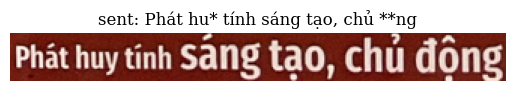

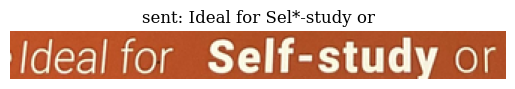

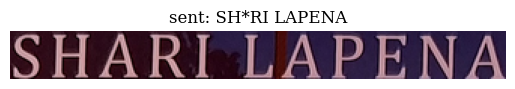

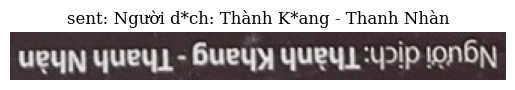

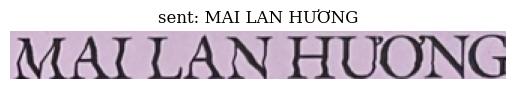

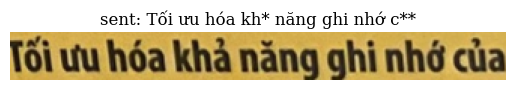

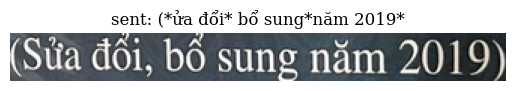

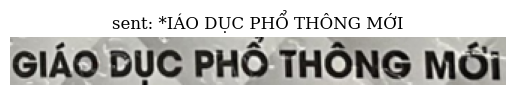

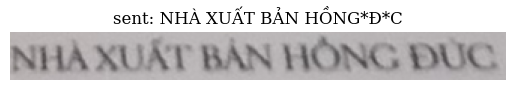

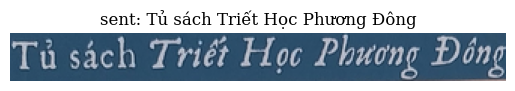

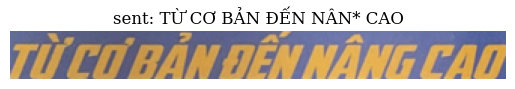

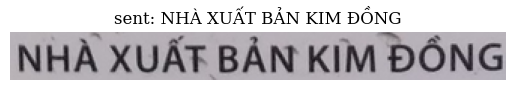

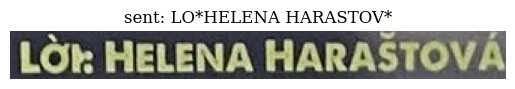

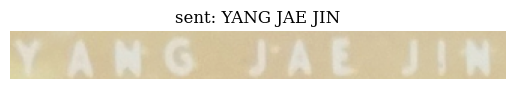

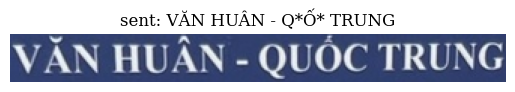

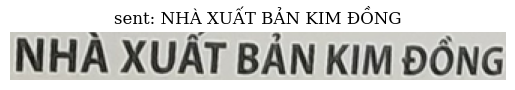

In [44]:
trainer.visualize_dataset()

Train now

In [45]:
trainer.train()

iter: 000200 - train loss: 1.875 - lr: 9.98e-04 - load time: 39.61 - gpu time: 77.45
iter: 000200 - valid loss: 1.002 - acc full seq: 0.2383 - acc per char: 0.6070
iter: 000400 - train loss: 0.838 - lr: 9.32e-04 - load time: 42.62 - gpu time: 76.78
iter: 000400 - valid loss: 0.670 - acc full seq: 0.6455 - acc per char: 0.8697
iter: 000600 - train loss: 0.718 - lr: 7.86e-04 - load time: 41.26 - gpu time: 77.68
iter: 000600 - valid loss: 0.664 - acc full seq: 0.6660 - acc per char: 0.8832
iter: 000800 - train loss: 0.652 - lr: 5.86e-04 - load time: 48.46 - gpu time: 78.04
iter: 000800 - valid loss: 0.593 - acc full seq: 0.7744 - acc per char: 0.9075
iter: 001000 - train loss: 0.607 - lr: 3.70e-04 - load time: 43.35 - gpu time: 74.59
iter: 001000 - valid loss: 0.585 - acc full seq: 0.7861 - acc per char: 0.9162
iter: 001200 - train loss: 0.588 - lr: 1.78e-04 - load time: 45.80 - gpu time: 80.48
iter: 001200 - valid loss: 0.583 - acc full seq: 0.8066 - acc per char: 0.9266
iter: 001400 - t

Visualize prediction from our trained model


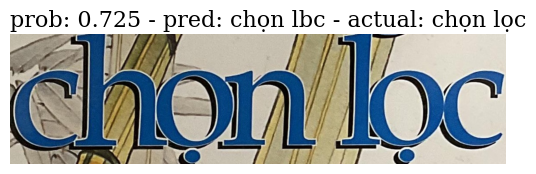

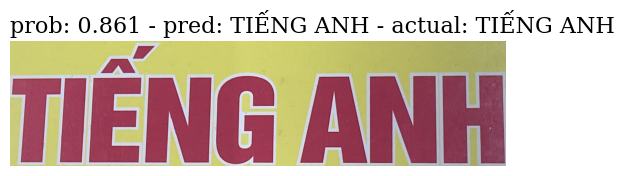

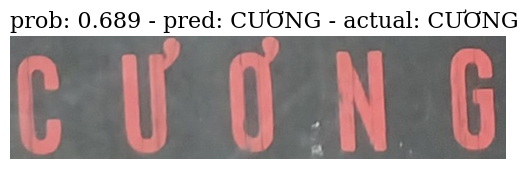

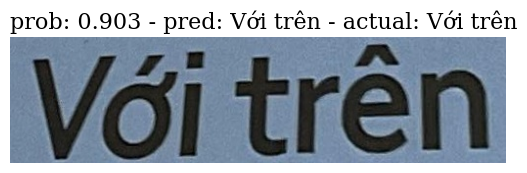

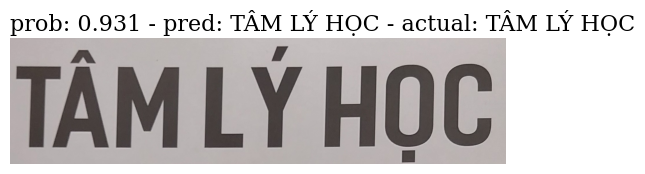

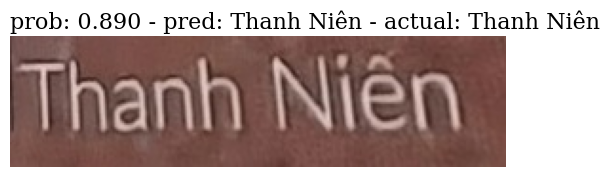

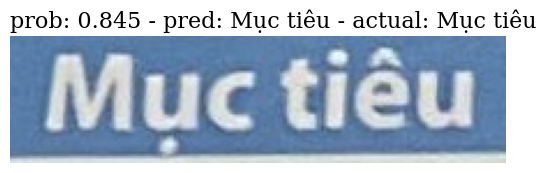

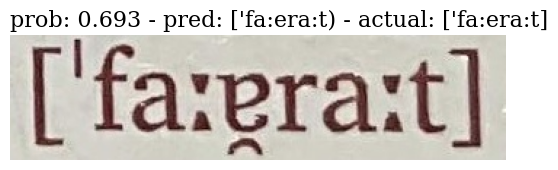

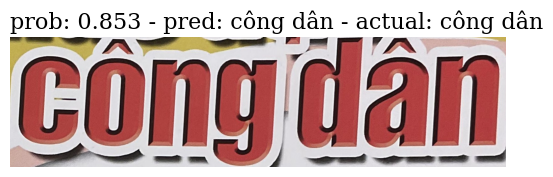

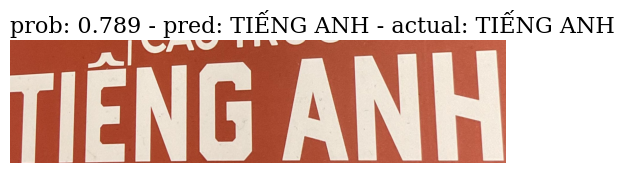

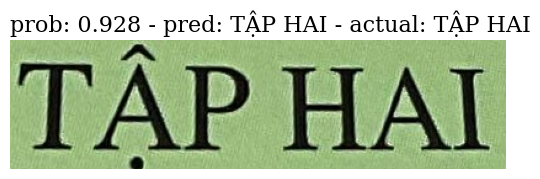

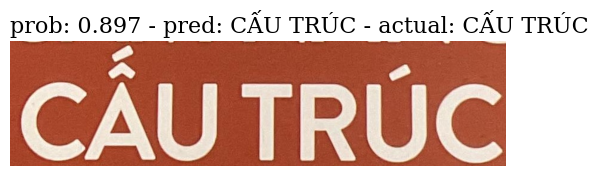

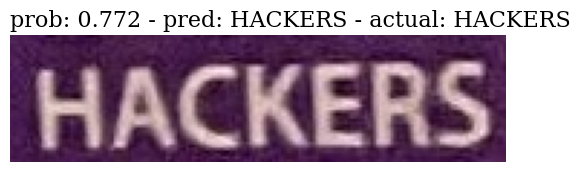

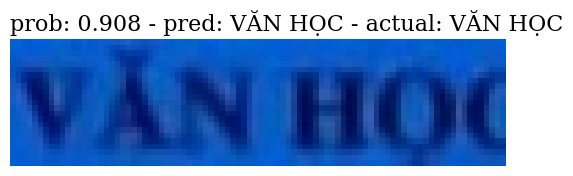

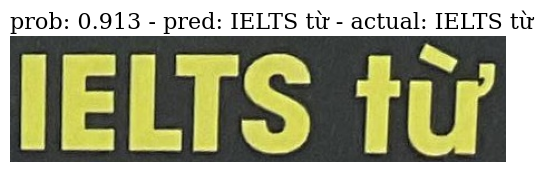

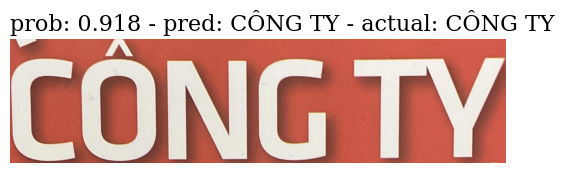

In [46]:
trainer.visualize_prediction()

In [43]:
trainer.config.save('config.yml')

Compute full seq accuracy for full valid dataset

In [47]:
trainer.precision()

(0.809375, 0.9308018)